In [169]:
import pandas as pd
import pickle 
import sqlite3
from sqlite3 import Error
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import std
import matplotlib as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict



In [170]:
df = pd.read_excel("../src/data/data.xlsx", sheet_name=['animal_data','shelter_data'])
animal_data = df['animal_data']
shelter_data = df['shelter_data']

In [171]:
animal_data

shelter_id intake_date Species  found_lng  found_lat  outcome_lng  \
0      Rochester  2021-01-28     Dog -77.633991  43.177237   -77.634618   
1      Rochester  2021-01-30     Dog -77.599173  43.185495   -77.583367   
2      Rochester  2021-01-30     Dog -77.617074  43.241926   -77.615373   
3      Rochester  2021-02-01     Dog -77.643231  43.180933   -77.645970   
4      Rochester  2021-02-03     Dog -77.650684  43.143780   -77.653187   
...          ...         ...     ...        ...        ...          ...   
23075    Atlanta  2019-01-31     Dog -84.288835  33.726502   -84.276410   
23076    Atlanta  2019-11-18     Dog -84.191581  33.718448   -84.192158   
23077    Atlanta  2019-11-19     Dog -84.280404  33.829848   -84.281226   
23078    Atlanta  2019-02-12     Dog -84.285380  33.697093   -84.283554   
23079    Atlanta  2019-09-06     Dog -84.179759  33.805191   -84.081048   

       outcome_lat  distance_miles  \
0        43.178387        0.085445   
1        43.171650        1.245466   
2        43.249483        0.528722   
3        43.179665        0.163735   
4        43.145435        0.170467   
...            ...             ...   
23075    33.706781        1.536071   
23076    33.718910        0.046022   
23077    33.830973        0.090819   
23078    33.698049        0.124132   
23079    33.914419        9.428101   

                                      found_address  \
0                  158 Glenwood ave Rochester 14613   
1             1094 HUDSON AVE 14621 Rochester 14621   
2                      17 Hughes pl Rochester 14608   
3      DRIVING PK and  2 CANARY ST. Rochester 14608   
4                    74 Thurston Rd Rochester 14608   
...                                             ...   
23075        2476 Brentwood Road DECATUR, 30032, GA   
23076                       4822 Truitt Ln GA 30035   
23077         1631 Hartland Drive Decatur, 30033 GA   
23078                   2549 Mcglynn Drive GA 30034   
23079                      929 Pine Roc Dr GA 30341   

                             outcome_address  
0        54 Tacoma Street Rochester NY 14613  
1           31 CROMBIE ST Rochester NY 14605  
2           4313 LAKE AVE Rochester NY 14612  
3             1 CANARY ST Rochester NY 14613  
4        216 DEPEW Street Rochester NY 14611  
...                                      ...  
23075     2176 Loving Drive Decatur GA 30037  
23076      4807 Wilkins Station Dr  GA 30035  
23077      1668 Hartland Dr Decatur GA 30033  
23078     254 McGlynn Drive Decatur GA 30034  
23079  3050 Howell Ct Lawrenceville GA 30044  

[23080 rows x 10 columns]

## understanding Animal Data 

In [172]:
animal_data.columns

Index(['shelter_id', 'intake_date', 'Species', 'found_lng', 'found_lat',
       'outcome_lng', 'outcome_lat', 'distance_miles', 'found_address',
       'outcome_address'],
      dtype='object')

In [173]:
dt = animal_data[['shelter_id','Species','distance_miles']]

In [174]:
dt

shelter_id Species  distance_miles
0      Rochester     Dog        0.085445
1      Rochester     Dog        1.245466
2      Rochester     Dog        0.528722
3      Rochester     Dog        0.163735
4      Rochester     Dog        0.170467
...          ...     ...             ...
23075    Atlanta     Dog        1.536071
23076    Atlanta     Dog        0.046022
23077    Atlanta     Dog        0.090819
23078    Atlanta     Dog        0.124132
23079    Atlanta     Dog        9.428101

[23080 rows x 3 columns]

<Figure size 1152x2160 with 0 Axes>

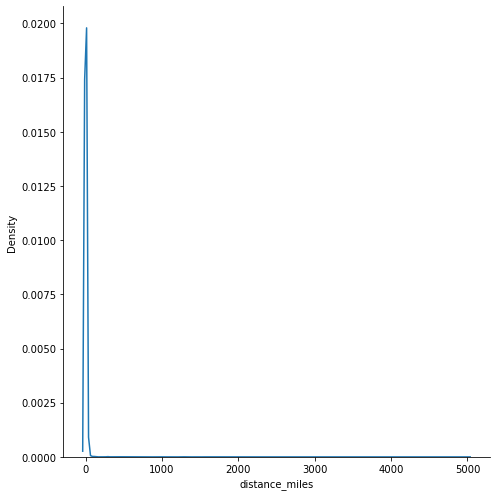

In [175]:
plt.figure(figsize=(16, 30))
g = sns.displot(data=dt, x="distance_miles", kind= "kde", height = 7)

most of the animals were found close to the outcome address and were able to be returned 

In [176]:
dt['shelter_id'].unique()

array(['Rochester', 'Oakland', 'Fresno', 'Mcallen', 'Tucson', 'Madera',
       'Las Vegas', 'Dallas', 'San Diego', 'Pasco', 'Atlanta'],
      dtype=object)

In [177]:
keys = [1,2,3,4,5,6,7,8,9,10,11]
x = dict(zip(dt['shelter_id'].unique(), keys))
x

{'Rochester': 1,
 'Oakland': 2,
 'Fresno': 3,
 'Mcallen': 4,
 'Tucson': 5,
 'Madera': 6,
 'Las Vegas': 7,
 'Dallas': 8,
 'San Diego': 9,
 'Pasco': 10,
 'Atlanta': 11}

In [178]:
dt2=dt.replace({"shelter_id": x})

In [179]:
dt2

shelter_id Species  distance_miles
0               1     Dog        0.085445
1               1     Dog        1.245466
2               1     Dog        0.528722
3               1     Dog        0.163735
4               1     Dog        0.170467
...           ...     ...             ...
23075          11     Dog        1.536071
23076          11     Dog        0.046022
23077          11     Dog        0.090819
23078          11     Dog        0.124132
23079          11     Dog        9.428101

[23080 rows x 3 columns]

In [180]:
dt['Species'].unique()

array(['Dog', 'Cat', 'Pet Reptile', 'Pig', 'Horse', 'Rabbit', 'DOG', nan,
       'Other'], dtype=object)

In [181]:
dt2.loc[dt2['Species'] == "DOG", "Species"] = 'Dog'

In [182]:
dt2['Species'].unique()

array(['Dog', 'Cat', 'Pet Reptile', 'Pig', 'Horse', 'Rabbit', nan,
       'Other'], dtype=object)

In [183]:
dt2['Species'].nunique()

7

In [184]:
dt2.nunique()

shelter_id           11
Species               7
distance_miles    18458
dtype: int64

In [185]:
keys2 = [101,102,103,104,105,106,100,107]
y = dict(zip(dt2['Species'].unique(), keys2))
y

{'Dog': 101,
 'Cat': 102,
 'Pet Reptile': 103,
 'Pig': 104,
 'Horse': 105,
 'Rabbit': 106,
 nan: 100,
 'Other': 107}

In [186]:
dt3=dt2.replace({"Species": y})

In [187]:
dt3['Species'].unique()

array([101, 102, 103, 104, 105, 106, 100, 107], dtype=int64)

In [188]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23080 entries, 0 to 23079
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shelter_id      23080 non-null  int64  
 1   Species         23080 non-null  int64  
 2   distance_miles  23054 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 541.1 KB


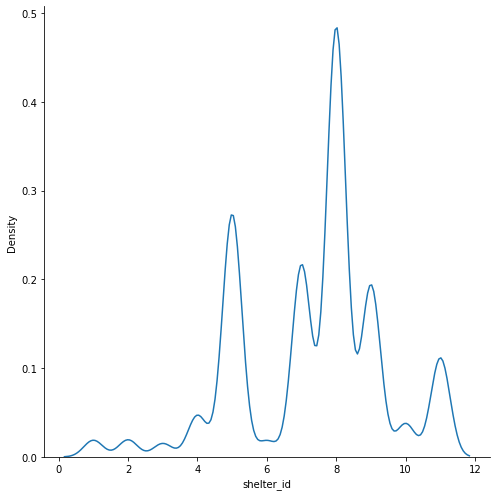

In [189]:
sns.displot(data=dt3,  x="shelter_id", kind="kde",height = 7)

denisity of most animals are at shlter id 8 being dallas 

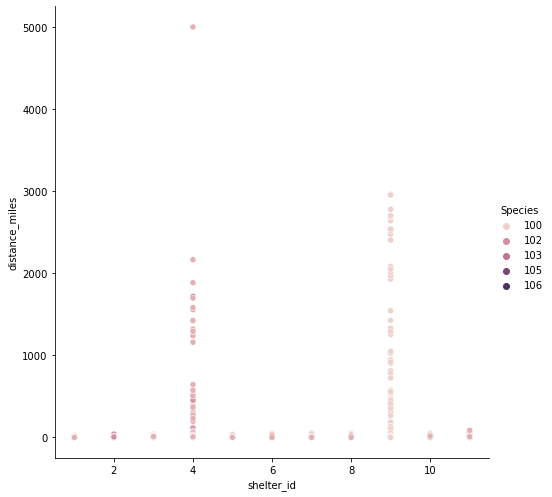

In [190]:
ax = sns.relplot(data=dt3, x="shelter_id", y="distance_miles",hue = "Species",height = 7)
g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

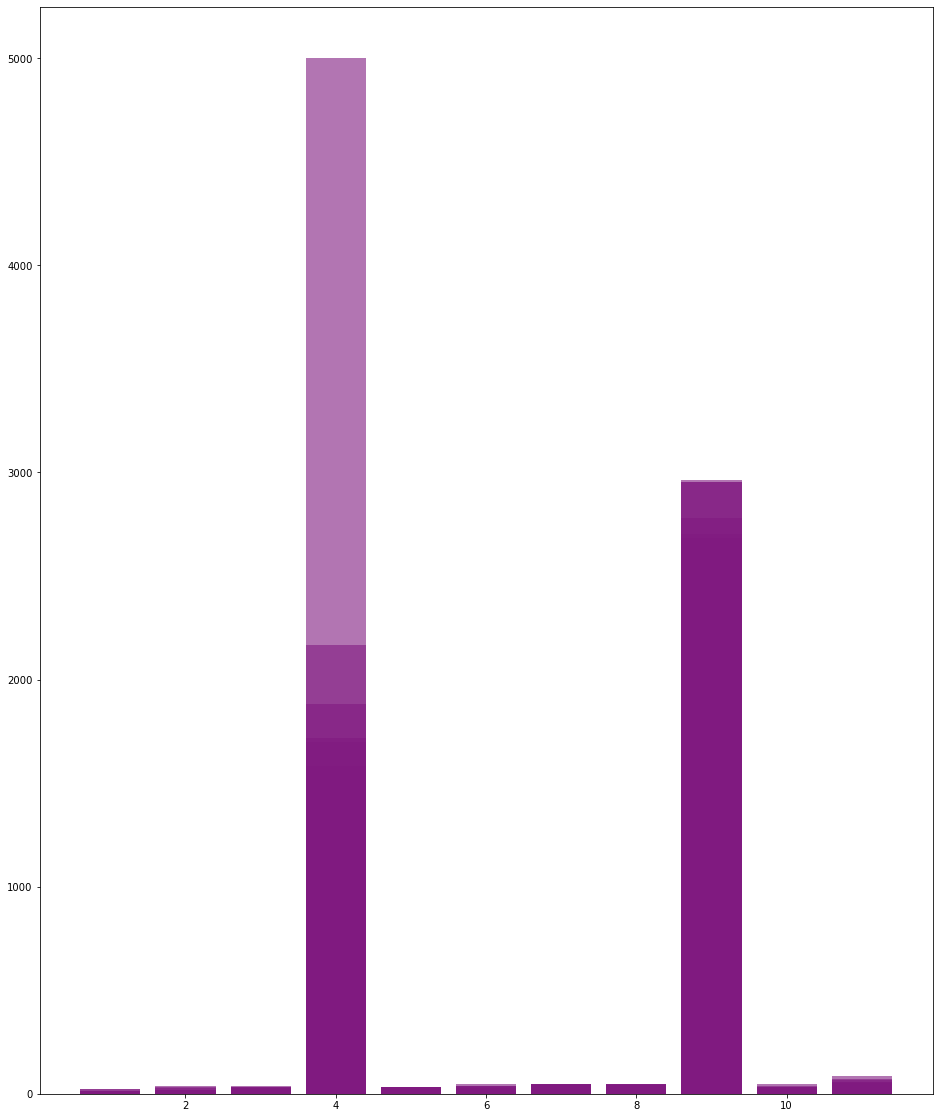

In [191]:
plt.figure(figsize=(16, 20))
plt.bar(dt3.shelter_id, dt3.distance_miles, color = (0.5,0.1,0.5,0.6))
plt.show()

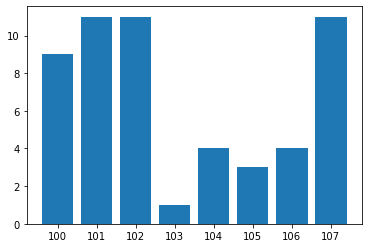

In [192]:

plt.bar(dt3.Species, dt3.shelter_id,)
plt.show()

## understanding shelter Data 

In [193]:
shelter_data = df['shelter_data']

In [194]:
shelter_data

shelter_id  annual_intake_2019  annual_intake_2020  annual_intake_2021  \
0   Rochester                3867              2732.0              2677.0   
1     Oakland                6188              5234.0              7613.0   
2      Fresno                8001              6246.0              6634.0   
3     Mcallen               21815             15511.0             15283.0   
4      Tucson               27064             17547.0             23940.0   
5      Madera                5166                 NaN                 NaN   
6   Las Vegas               27922             17957.0                 NaN   
7      Dallas               40155             19594.0             18533.0   
8   San Diego               33555             31871.0             30803.0   
9       Pasco                9906             11370.0              6510.0   
10    Atlanta                8288              7062.0              8302.0   

    jurisdiction_size_sq_km justidiction_state jurisdiction_region  \
0                      3541                 NY       Monroe County   
1                      1914                 CA      Alameda County   
2                     15568                 CA       Fresno County   
3                      4100                 TX      Hidalgo County   
4                     23799                 AZ         Pima County   
5                      5576                 CA       Madera County   
6                     20878                 NV        Clark County   
7                      1992                 TX         Dallas City   
8                     11036                 TX    San Diego County   
9                      2250                 FL        Pasco County   
10                      702                 GA       Dekalb County   

    jurisdiction_pop_size  jurisdiction_pop_density_person_per_sq_km  
0                  741770                                 209.480373  
1                 1682353                                 878.972309  
2                  999101                                  64.176580  
3                  868707                                 211.879756  
4                 1043433                                  43.843565  
5                  156255                                  28.022776  
6                 2265461                                 108.509484  
7                 1304379                                 654.808735  
8                 3338000                                 302.464661  
9                  553947                                 246.198667  
10                 764382                                1088.863248

In [195]:
dfnew = shelter_data[['shelter_id','annual_intake_2019','annual_intake_2020','annual_intake_2021']]

<AxesSubplot:xlabel='shelter_id'>

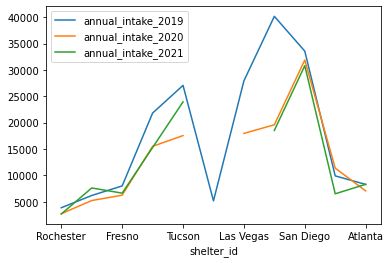

In [196]:
dfnew.set_index('shelter_id').plot()

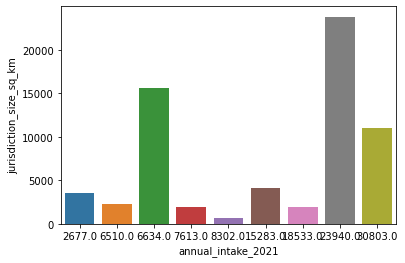

In [197]:
ax = sns.barplot(data=shelter_data, x = 'annual_intake_2021'  , y = 'jurisdiction_size_sq_km')

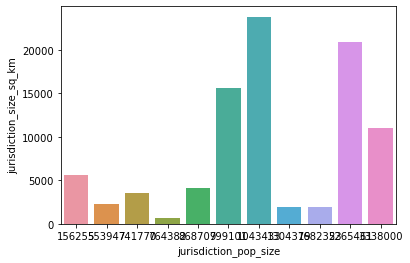

In [198]:
ax = sns.barplot(data=shelter_data, x = 'jurisdiction_pop_size'  , y = 'jurisdiction_size_sq_km')

## observations from graphs 

from the above graphs we understand 
- shelter in dallas tho less in size compared to other shlters has more density of animal intake and has increased this intake stedily over the years . 
- Dallas shelter has the highest size/pop ratio helping with the animal adoptation number 
- Most number of species in the shelters are dogs and cats  

In [199]:
ax1=animal_data.replace({"shelter_id": x})
ax1.loc[ax1['Species'] == "DOG", "Species"] = 'Dog'
keys2 = [101,102,103,104,105,106,100,107]
y = dict(zip(dt2['Species'].unique(), keys2))
ax2 = ax1.replace({"Species": y})
mask3 = (((ax2['shelter_id'] == 7)))
dt4 = ax2[mask3][['shelter_id', 'intake_date', 'Species', 'found_lng', 'found_lat',
       'outcome_lng', 'outcome_lat', 'distance_miles', 'found_address',
       'outcome_address']]

In [200]:
dt4

shelter_id intake_date  Species   found_lng  found_lat  outcome_lng  \
6296           7  2019-01-01      101 -115.106554  36.176480  -115.239166   
6297           7  2019-01-01      101 -115.133817  36.247944  -115.148735   
6298           7  2019-01-01      101 -115.156539  36.273654  -115.186855   
6299           7  2019-01-01      101 -115.108231  36.196280  -115.096616   
6300           7  2019-01-01      101 -115.177355  36.284546  -115.179977   
...          ...         ...      ...         ...        ...          ...   
9772           7  2019-12-31      101 -115.106300  36.216030  -115.093200   
9773           7  2019-12-31      101 -115.235100  36.189300  -115.078500   
9774           7  2019-12-31      101 -115.167300  36.124400  -115.145600   
9775           7  2019-12-31      101 -115.125400  36.170490  -115.125000   
9776           7  2019-12-31      101 -115.156700  36.261140  -115.163900   

      outcome_lat  distance_miles  \
6296    36.290830       10.818320   
6297    36.254894        0.961063   
6298    36.240394        2.850475   
6299    36.230593        2.453264   
6300    36.280232        0.331535   
...           ...             ...   
9772    36.210170        0.834574   
9773    36.119840        9.977234   
9774    36.093190        2.471943   
9775    36.170360        0.027519   
9776    36.266750        0.556106   

                                         found_address  \
6296                  655 MOJAVE RD LAS VEGAS NV 89101   
6297     4824 CELSION ROCK ST NORTH LAS VEGAS NV 89081   
6298      1030 STABLE GLEN DR NORTH LAS VEGAS NV 89031   
6299      2842 LAKE MEAD BLVD NORTH LAS VEGAS NV 89030   
6300        6600 ALIANTE PKWY NORTH LAS VEGAS NV 89084   
...                                                ...   
9772        3130 BLACKFOOT CT NORTH LAS VEGAS NV 89030   
9773                  6500 VEGAS DR LAS VEGAS NV 89108   
9774            3355 LAS VEGAS BLVD LAS VEGAS NV 89109   
9775                   389 BRUCE ST LAS VEGAS NV 89101   
9776  ANN RD/ CAMINO AL NORTE NORTH LAS VEGAS NV 89031   

                                    outcome_address  
6296             6658 ELKHORN RD LAS VEGAS NV 89131  
6297  5216 JOSE ERNESTO ST NORTH LAS VEGAS NV 89031  
6298    4427 NORMA JEAN LN NORTH LAS VEGAS NV 89031  
6299         3903 EBLICK WASH DR LAS VEGAS NV 89115  
6300  2904 GNATCATCHER AVE NORTH LAS VEGAS NV 89084  
...                                             ...  
9772               3847 ALTO AVE LAS VEGAS NV 89115  
9773            3834 FLORRIE AVE LAS VEGAS NV 89121  
9774             3770 SWENSON ST LAS VEGAS NV 89119  
9775              1701 CEDAR AVE LAS VEGAS NV 89101  
9776  1630 BLACK HILLS WAY NORTH LAS VEGAS NV 89031  

[3481 rows x 10 columns]

In [201]:
dt4['intake_date'].nunique()
# plt.bar(dt4.intake_date,height = 7)
# plt.show()

364

In [202]:
dt4['month'] = pd. DatetimeIndex(dt4['intake_date']). month

In [203]:
dt4

shelter_id intake_date  Species   found_lng  found_lat  outcome_lng  \
6296           7  2019-01-01      101 -115.106554  36.176480  -115.239166   
6297           7  2019-01-01      101 -115.133817  36.247944  -115.148735   
6298           7  2019-01-01      101 -115.156539  36.273654  -115.186855   
6299           7  2019-01-01      101 -115.108231  36.196280  -115.096616   
6300           7  2019-01-01      101 -115.177355  36.284546  -115.179977   
...          ...         ...      ...         ...        ...          ...   
9772           7  2019-12-31      101 -115.106300  36.216030  -115.093200   
9773           7  2019-12-31      101 -115.235100  36.189300  -115.078500   
9774           7  2019-12-31      101 -115.167300  36.124400  -115.145600   
9775           7  2019-12-31      101 -115.125400  36.170490  -115.125000   
9776           7  2019-12-31      101 -115.156700  36.261140  -115.163900   

      outcome_lat  distance_miles  \
6296    36.290830       10.818320   
6297    36.254894        0.961063   
6298    36.240394        2.850475   
6299    36.230593        2.453264   
6300    36.280232        0.331535   
...           ...             ...   
9772    36.210170        0.834574   
9773    36.119840        9.977234   
9774    36.093190        2.471943   
9775    36.170360        0.027519   
9776    36.266750        0.556106   

                                         found_address  \
6296                  655 MOJAVE RD LAS VEGAS NV 89101   
6297     4824 CELSION ROCK ST NORTH LAS VEGAS NV 89081   
6298      1030 STABLE GLEN DR NORTH LAS VEGAS NV 89031   
6299      2842 LAKE MEAD BLVD NORTH LAS VEGAS NV 89030   
6300        6600 ALIANTE PKWY NORTH LAS VEGAS NV 89084   
...                                                ...   
9772        3130 BLACKFOOT CT NORTH LAS VEGAS NV 89030   
9773                  6500 VEGAS DR LAS VEGAS NV 89108   
9774            3355 LAS VEGAS BLVD LAS VEGAS NV 89109   
9775                   389 BRUCE ST LAS VEGAS NV 89101   
9776  ANN RD/ CAMINO AL NORTE NORTH LAS VEGAS NV 89031   

                                    outcome_address  month  
6296             6658 ELKHORN RD LAS VEGAS NV 89131      1  
6297  5216 JOSE ERNESTO ST NORTH LAS VEGAS NV 89031      1  
6298    4427 NORMA JEAN LN NORTH LAS VEGAS NV 89031      1  
6299         3903 EBLICK WASH DR LAS VEGAS NV 89115      1  
6300  2904 GNATCATCHER AVE NORTH LAS VEGAS NV 89084      1  
...                                             ...    ...  
9772               3847 ALTO AVE LAS VEGAS NV 89115     12  
9773            3834 FLORRIE AVE LAS VEGAS NV 89121     12  
9774             3770 SWENSON ST LAS VEGAS NV 89119     12  
9775              1701 CEDAR AVE LAS VEGAS NV 89101     12  
9776  1630 BLACK HILLS WAY NORTH LAS VEGAS NV 89031     12  

[3481 rows x 11 columns]

In [204]:
dt4['counts'] = dt4.month.map(dt4.month.value_counts())

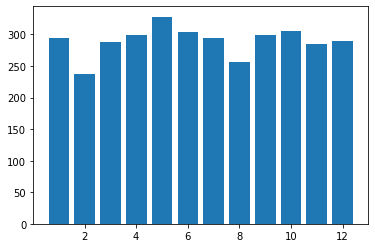

In [205]:
plt.bar(dt4.month,dt4.counts)
plt.show()
## we understand nothing about the intake patters from below 

In [206]:
dt4

shelter_id intake_date  Species   found_lng  found_lat  outcome_lng  \
6296           7  2019-01-01      101 -115.106554  36.176480  -115.239166   
6297           7  2019-01-01      101 -115.133817  36.247944  -115.148735   
6298           7  2019-01-01      101 -115.156539  36.273654  -115.186855   
6299           7  2019-01-01      101 -115.108231  36.196280  -115.096616   
6300           7  2019-01-01      101 -115.177355  36.284546  -115.179977   
...          ...         ...      ...         ...        ...          ...   
9772           7  2019-12-31      101 -115.106300  36.216030  -115.093200   
9773           7  2019-12-31      101 -115.235100  36.189300  -115.078500   
9774           7  2019-12-31      101 -115.167300  36.124400  -115.145600   
9775           7  2019-12-31      101 -115.125400  36.170490  -115.125000   
9776           7  2019-12-31      101 -115.156700  36.261140  -115.163900   

      outcome_lat  distance_miles  \
6296    36.290830       10.818320   
6297    36.254894        0.961063   
6298    36.240394        2.850475   
6299    36.230593        2.453264   
6300    36.280232        0.331535   
...           ...             ...   
9772    36.210170        0.834574   
9773    36.119840        9.977234   
9774    36.093190        2.471943   
9775    36.170360        0.027519   
9776    36.266750        0.556106   

                                         found_address  \
6296                  655 MOJAVE RD LAS VEGAS NV 89101   
6297     4824 CELSION ROCK ST NORTH LAS VEGAS NV 89081   
6298      1030 STABLE GLEN DR NORTH LAS VEGAS NV 89031   
6299      2842 LAKE MEAD BLVD NORTH LAS VEGAS NV 89030   
6300        6600 ALIANTE PKWY NORTH LAS VEGAS NV 89084   
...                                                ...   
9772        3130 BLACKFOOT CT NORTH LAS VEGAS NV 89030   
9773                  6500 VEGAS DR LAS VEGAS NV 89108   
9774            3355 LAS VEGAS BLVD LAS VEGAS NV 89109   
9775                   389 BRUCE ST LAS VEGAS NV 89101   
9776  ANN RD/ CAMINO AL NORTE NORTH LAS VEGAS NV 89031   

                                    outcome_address  month  counts  
6296             6658 ELKHORN RD LAS VEGAS NV 89131      1     294  
6297  5216 JOSE ERNESTO ST NORTH LAS VEGAS NV 89031      1     294  
6298    4427 NORMA JEAN LN NORTH LAS VEGAS NV 89031      1     294  
6299         3903 EBLICK WASH DR LAS VEGAS NV 89115      1     294  
6300  2904 GNATCATCHER AVE NORTH LAS VEGAS NV 89084      1     294  
...                                             ...    ...     ...  
9772               3847 ALTO AVE LAS VEGAS NV 89115     12     290  
9773            3834 FLORRIE AVE LAS VEGAS NV 89121     12     290  
9774             3770 SWENSON ST LAS VEGAS NV 89119     12     290  
9775              1701 CEDAR AVE LAS VEGAS NV 89101     12     290  
9776  1630 BLACK HILLS WAY NORTH LAS VEGAS NV 89031     12     290  

[3481 rows x 12 columns]

In [207]:
import folium

In [208]:
outcome_loc = [dt4['outcome_lat'].mean(), dt4['outcome_lng'].mean()]
outcome_map = folium.Map(location = outcome_loc, tiles="Openstreetmap", zoom_start = 5, control_scale=True)
for index, loc in dt4.iterrows():
    folium.CircleMarker([loc['outcome_lat'], loc['outcome_lng']], radius=2, weight=5,color="red").add_to(outcome_map)
folium.LayerControl().add_to(outcome_map)
outcome_map

In [209]:
found_loc = [dt4['found_lat'].mean(), dt4['found_lng'].mean()]
map1 = folium.Map(location = found_loc, tiles='Openstreetmap', zoom_start = 5, control_scale=True)
for index, loc in dt4.iterrows():
    folium.CircleMarker([loc['found_lat'], loc['found_lng']], radius=2, weight=5).add_to(map1)
folium.LayerControl().add_to(map1)
map1

## observations from maps 
animals are found very rarley on a freeeway where are hugh ways and main roads have 1:5 chance of spotting an animal to be found from the surrounding houses 

## predicting the location where the animals can be found 

In [210]:
dt5 = dt4

In [211]:
y = dt4[['found_lng','found_lat']]
dt4.drop(['shelter_id','found_lng','found_lat','intake_date','month','counts','found_address','outcome_address'] , axis=1 , inplace = True)

In [212]:
dt4.columns

Index(['Species', 'outcome_lng', 'outcome_lat', 'distance_miles'], dtype='object')

In [213]:
X_train, X_test, y_train, y_test = train_test_split(dt4, y, test_size=0.2 , random_state=43)

In [214]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.00000000e+00, 5.83016850e-01, 6.58866266e-01, 6.81140649e-04],
       [0.00000000e+00, 5.92737060e-01, 6.67348087e-01, 9.28931306e-04],
       [0.00000000e+00, 4.86597593e-01, 6.48775603e-01, 1.28250927e-02],
       ...,
       [0.00000000e+00, 4.63503941e-01, 6.29945704e-01, 1.11342648e-01],
       [0.00000000e+00, 4.41062652e-01, 7.45261137e-01, 0.00000000e+00],
       [0.00000000e+00, 4.87902319e-01, 7.10008168e-01, 5.61546070e-02]])

In [215]:
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.        , 0.44817341, 0.58583123, 0.00957932],
       [0.        , 0.42690637, 0.66165922, 0.12544792],
       [0.        , 0.62052773, 0.6304541 , 0.0049971 ],
       ...,
       [0.        , 0.52234709, 0.6676055 , 0.02201579],
       [0.        , 0.62052773, 0.6304541 , 0.0919195 ],
       [0.        , 0.49201221, 0.65764355, 0.00417594]])

## Linear Regression model

In [216]:
regressor=LinearRegression()
regressor.fit(X_train_minmax,y_train)

LinearRegression()

In [217]:
y_pred=regressor.predict(X_test_minmax)

In [218]:
l = pd.DataFrame(y_pred)

In [219]:
predicted_values = [l[1].mean(), l[0].mean()]
predicted_map = folium.Map(location = predicted_values, tiles='Openstreetmap', zoom_start = 5, control_scale=True)
for index, loc in l.iterrows():
    folium.CircleMarker([loc[1], loc[0]], radius=2, weight=5,colour = "YlGn").add_to(predicted_map)
folium.LayerControl().add_to(predicted_map)
predicted_map

- top ten locations around your area where an animal can be found 
- notification regarding danger zones for animals 


In [220]:
SQR_linearreg = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_linearreg = r2_score(y_test, y_pred)
cv_r2_scores_lr = cross_val_score(regressor, dt4, y, cv=5,scoring='r2')
print(cv_r2_scores_lr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_lr)))

[0.564079   0.62384418 0.49454263 0.50512961 0.60247914]
Mean 5-Fold R Squared: 0.5580149100119665


## function for predicting value  with regression tree 

In [221]:
animal_data.dropna(inplace = True)

In [222]:
y1 = animal_data[['found_lng','found_lat']]
animal_data.drop(['shelter_id','Species','found_lng','found_lat','intake_date','found_address','outcome_address','distance_miles'] , axis=1 , inplace = True)

In [223]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(animal_data, y1, test_size=0.2 , random_state=43)

In [224]:
regr_2 = DecisionTreeRegressor(max_depth=5)
clf1 = regr_2.fit(X_train1, y_train1)
predicted1= clf1.predict(X_test1)

In [225]:
lp=pd.DataFrame(predicted1)

In [226]:
predicted_values = [lp[1].mean(), lp[0].mean()]
predicted_map = folium.Map(location = predicted_values, tiles='Openstreetmap', zoom_start = 5, control_scale=True)
for index, loc in l.iterrows():
    folium.CircleMarker([loc[1], loc[0]], radius=2, weight=5,colour = "YlGn").add_to(predicted_map)
folium.LayerControl().add_to(predicted_map)
predicted_map

In [227]:
predicted_values

[33.24451804179323, -102.1582965087091]

In [228]:

# predicted1= clf1.predict(lst)
# with open('model2', 'wb') as files:
#     pickle.dump(predicted1, files)


In [232]:
lst = [[100.0409517, 100.9451528 ]]
predicted1= clf1.predict(lst)
with open('model3', 'wb') as files:
    pickle.dump(clf1, files)
predicted1

array([[-77.59705023,  43.17790465]])